<a href="https://colab.research.google.com/github/BasiraS/data_analytics_2/blob/main/Python/Unit3_L2_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Basira Shirzad

#Date: 01-12-2021

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [98]:
type(df)

pandas.core.frame.DataFrame

In [99]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [100]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [101]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [102]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [103]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [104]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [105]:
# New Data Frame of only columns: 'sex' and 'salary'
new_df = df[['sex', 'salary']]
new_df

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary

In [106]:
# Median Salary of both Male and Female
new_df.groupby('sex').median()

,salary
sex,
Female,103750
Male,108043


Finding the Median salary for all males

In [107]:
# Median Salary of Male
new_df[new_df['sex'] == 'Male'].median()

salary    108043.0
dtype: float64

Finding the Median salary for all females

In [108]:
# Median Salary of Female 
new_df[new_df['sex'] == 'Female'].median()

salary    103750.0
dtype: float64

Comparing the Mean salary of Males and Females

In [109]:
# Mean salary of Males and Females
new_df.groupby('sex').mean()

,salary
sex,
Female,101002.410256
Male,115090.418994


In [110]:
# Mean Salary of Males
male_mean_salary = new_df[new_df['sex'] == 'Male'].mean()
male_mean_salary

salary    115090.418994
dtype: float64

In [111]:
# Mean Salary of Males
female_mean_salary = new_df[new_df['sex'] == 'Female'].mean()
female_mean_salary

salary    101002.410256
dtype: float64

In [112]:
# The difference between mean salaries of male and female
male_mean_salary - female_mean_salary

salary    14088.008738
dtype: float64

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [113]:
# Number of people who have 20 years of experience
df[df['yrs.service'] == 20]['yrs.service'].count()

10

In [114]:
# Mean Salary of people who have 20 years of experience
df[df['yrs.service'] == 20]['salary'].mean()

128647.3

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [115]:
# Number of people who have 20+ years of experience
df[df['yrs.service'] >= 20]['yrs.service'].count()

157

In [116]:
# Mean Salary of people who have 20+ years of experience
mean_salary_20PlusYears = df[df['yrs.service'] >= 20]['salary'].mean()
mean_salary_20PlusYears

122520.65605095541

In [117]:
# Number of people who have less than 20 years of experience
df[df['yrs.service'] < 20]['yrs.service'].count()

240

In [118]:
# Mean Salary of people who have less than 20 years of experience
mean_salary_LessThan20Years = df[df['yrs.service'] < 20]['salary'].mean()
mean_salary_LessThan20Years

107940.50416666667

In [119]:
# Difference of 20+ years of experience and less than 20 years of experience
mean_salary_20PlusYears - mean_salary_LessThan20Years

14580.151884288745

People who have salary of greater than or equal to 200,000

In [120]:
# People who have a salary greater than or equal to 200,000
df[df['salary'] >= 200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


In [121]:
# Number of people who have a salary greater than or equal to 200,000
df[df['salary'] >= 200000]['salary'].count()

3

Findings:
* There are 10 people who have 20 years of experience and an average salary of 128,647. 
* There are 157 people who have 20 plus years of experience and an average salary of 122,520.
* There are 240 people who have less than 20 years of experience and an average salary of 107,940. 
* There are 3 people with a salary of greater than or equal to 200,000.


# Rename values, subset columns, etc

In [122]:
df.rename(columns={'Unnamed: 0': 'Person #', 'rank': 'Title', 'discipline': 'Track', 'yrs.since.phd': 'YrsOfExperienceSincePhd', 'yrs.service': 'YrsOfService', 'sex': 'Gender', 'salary': 'Salary'})

,Person #,Title,Track,YrsOfExperienceSincePhd,YrsOfService,Gender,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

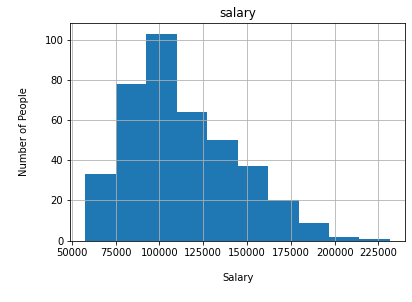

In [123]:
# Number of people with a certain type of salary
new_df.hist()
plt.xlabel('\nSalary\n')
plt.ylabel('\nNumber of People\n')
plt.show()

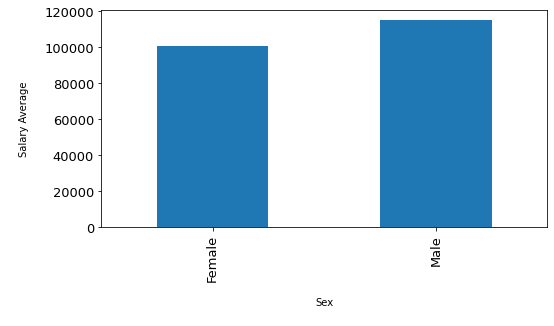

In [124]:
# Comparison between Male and Female Employees Average Salary
df.groupby(['sex'])['salary'].mean().plot(kind='bar', figsize=(8,4), fontsize=13)
plt.xlabel('\nSex\n')
plt.ylabel('\nSalary Average\n')
plt.show()

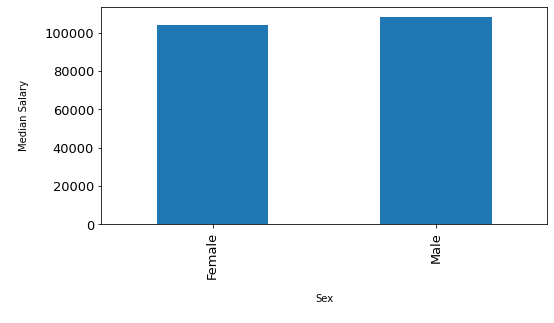

In [125]:
# Comparison between Male and Female Employees Median Salary
df.groupby(['sex'])['salary'].median().plot(kind='bar', figsize=(8,4), fontsize=13)
plt.xlabel('\nSex\n')
plt.ylabel('\nMedian Salary\n')
plt.show()

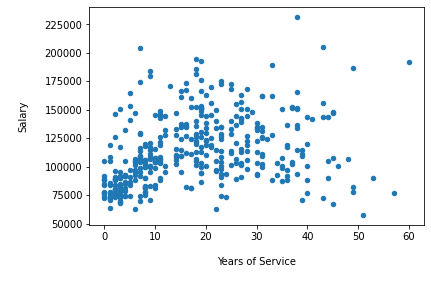

In [126]:
# Correlation between years of experience and salary 
df.plot(kind='scatter', x = 'yrs.service', y = 'salary')
plt.xlabel('\nYears of Service\n')
plt.ylabel('\nSalary\n')
plt.show()

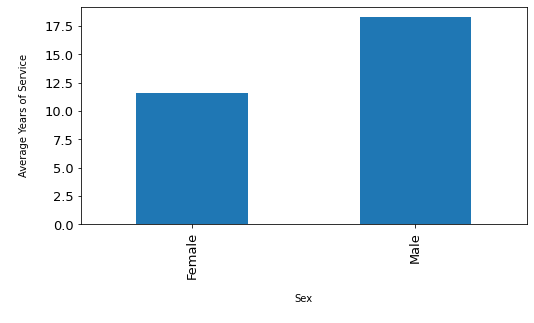

In [127]:
# Comparison between Male and Female Employees Median Salary
df.groupby(['sex'])['yrs.service'].mean().plot(kind='bar', figsize=(8,4), fontsize=13)
plt.xlabel('\nSex\n')
plt.ylabel('\nAverage Years of Service\n')
plt.show()

Your observations from the visuals: 
* Many people make an average of $100,000
* Majority of Male make more than Female on average, but the median is around the same. 
* There seems to be some kind of correlation between the number of experience and salary, but there are many outliers. 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Male employees tend to make more than female employees on average and male employees tend to stay at the same job for a longer period of years than females. With this result, I decided to create a scatter plot to see the correlation between years of service and salary and there was not a clear picture of that because of the many outliers in the figure. 